#  Task 3
Task: Create a POC for accessing free features using open-source alternatives to OpenAI for given tasks.
Description: Explore and implement a proof-of-concept solution to access free features for given tasks. Investigate open-source models or alternatives like Bard, etc. Define smaller tasks within the POC that showcase the functionality of accessing these features without incurring costs. (task description provided in the document attached TASK3)

### Finding Free alternatives Models to Open AI for Legal Tasks
Objective: The primary goal of this task is to investigate alternative free of cost models to OpenAI, such as Bard or any relevant open-source models, to showcase similar functionality to OpenAI without incurring costs.
Features to Implement:
1.	Researchbook Name Generation:
- Description: Develop a mechanism to generate research book names based on legal queries. Use the model you found to achieve the desired responses. 
- Examples:(For the given query, the research book names generated by GPT are as follows) 
    - Query: "Siblings Murder"  
        - Research Book Name: " Analyzing Murder Cases: Relevant Judgments and Legal Insights "
    - Query: " Cheque Bounce "  
	    - Research Book Name: " Cheque Bounce Chronicles: Legal Perspectives and Summaries "
    - Query: " Murder "  
        - Research Book Name: "Understanding Sibling Murder Cases: Relevant Judgments and Legal Strategies"
    - Query: " Is a last will considered the final will of a person? "
        - Research Book Name: " Finality of Last Wills: Legal Implications and Precedents"


2.	Generating Enhanced Facts:
- Description: Develop a mechanism to generate enhanced legal facts from the given facts. This involves transforming standard facts into more detailed and context-rich information. Use the model you found to achieve the desired responses.
- Examples:(Given facts and corresponding enhanced facts generated by GPT)
    - Fact: "Loan pending with the bank."
        - Enhanced Fact: "A loan is pending with a bank."
    - Fact: "Physical or mental torture."
        - Enhanced Fact: "The victim suffered from torture, whether physical or mental."
    - Fact: "The accused did not create or submit forged documents to the authority."
        - Enhanced Fact: "The defendant did not produce or present falsified records to the governing body."



- Finding A Text to Text model 
- Langchain Exploring 
- Google Search engine Connection with langchain 

### Exploring Huggingface open source model

- Model Name : "google/flan-t5-large"


In [2]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large", device_map="auto", torch_dtype=torch.float16)

input_text = "translate Enimport torchglish to German: How old are you?"
input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)

outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0]))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\transformers\generation\utils.py:1133: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


<pad> Wie alte sind Sie?</s>


### Exploring Langchain tools for Google Search 

- Enable Google Search API from here 
    - https://console.cloud.google.com/apis/library/customsearch.googleapis.com
- Create a Programable Search Engine 
    - https://programmablesearchengine.google.com/


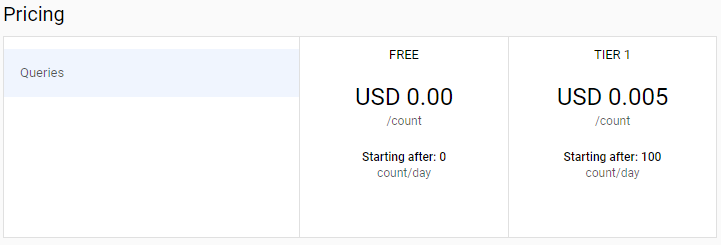

In [1]:
import os
from __secreat_envfiles import (GOOGLE_API_KEY, GOOGLE_CSE_ID,SERPER_API_KEY)

In [2]:
from langchain.tools import Tool
from langchain_community.utilities import GoogleSearchAPIWrapper

search = GoogleSearchAPIWrapper(google_cse_id = GOOGLE_CSE_ID)

tool = Tool(
    name="google_search",
    description="Search Google for recent results.",
    func=search.run,
    
)

In [ ]:
tool.run("Obama's first name?")

#### Integrate Search with Opensource Models

In [3]:
from langchain_community.llms import HuggingFaceHub
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

question = "Who won the FIFA World Cup in the year 1994? "
template = """Question: {question}
Answer: Let's think step by step."""
prompt = PromptTemplate.from_template(template)
repo_id = "google/flan-t5-large"  
llm = HuggingFaceHub(repo_id=repo_id, model_kwargs={"temperature": 0.5, "max_length": 64})
# llm_chain = LLMChain(prompt=prompt, llm=llm)
# print(llm_chain.run(question))

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from langchain.agents import AgentType, initialize_agent, load_tools

tools = load_tools(["google-search"], llm=llm,google_cse_id=GOOGLE_CSE_ID)

agent = initialize_agent(
    tools, llm, verbose=True,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION
)

In [8]:
agent.run("What is the weather in Pomfret?")



> Entering new AgentExecutor chain...


ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `['Pomfret']`

### Exploring Langchain Tools for **Duck Duck Go** Search 

In [14]:
from langchain.utilities import DuckDuckGoSearchAPIWrapper
search_engine_api_wrapper = DuckDuckGoSearchAPIWrapper()
# search_engine_api_wrapper.run("Age of ultron")
type(search_engine_api_wrapper)

langchain_community.utilities.duckduckgo_search.DuckDuckGoSearchAPIWrapper

In [15]:
from langchain.tools import DuckDuckGoSearchRun
search_engine_run= DuckDuckGoSearchRun(api_wrapper=search_engine_api_wrapper)
# search_engine_run.run("Age of ultron")
type(search_engine_run)

langchain_community.tools.ddg_search.tool.DuckDuckGoSearchRun

In [17]:
from langchain.tools import Tool
search_engine_tool = Tool(name='Duck Duck Go Search Engine Tool',
        func=search_engine_run.run,
        description='It is useful when need to search new Information It will search in entire Web and get required result')


#### Fetching open source LLMs from Huggingface 

In [18]:
import os
from __secreat_envfiles import HUGGINGFACEHUB_API_TOKEN
os.environ["HUGGINGFACEHUB_API_TOKEN"] = HUGGINGFACEHUB_API_TOKEN

In [19]:
from langchain import HuggingFaceHub
repo_id = 'google/flan-t5-large'
llm = HuggingFaceHub(
    repo_id=repo_id, model_kwargs={"temperature": 0.9}
)
llm.invoke("Tell me few line about you ")

'i am a scottish'

In [20]:
type(llm)


langchain_community.llms.huggingface_hub.HuggingFaceHub

##### Creating Langchain Agent 

In [21]:
from langchain_google_genai import GoogleGenerativeAI
from __secreat_envfiles import GOOGLE_GEN_AI_API_KEY
llm = GoogleGenerativeAI(model="models/text-bison-001", google_api_key=GOOGLE_GEN_AI_API_KEY)


In [26]:
from langchain.agents import initialize_agent
agent = initialize_agent(
    agent = "zero-shot-react-description",
    tools= [search_engine_run],
    llm=llm, 
    verbose=True,
    max_iteration = 1

)

In [27]:
agent.get_prompts()

[]

In [28]:
agent.run('Find Few Books about Siblings Murder')



> Entering new AgentExecutor chain...
I need to find books about siblings murder
Action: duckduckgo_search
Action Input: siblings murder books
Observation: Despite her sister's tireless advocacy, Addimando was convicted in 2019 of second-degree murder and illegal possession of a weapon; a year later, she was sentenced to 19 years to life in prison. Read an excerpt from Horton's intimate memoir. "Dear Sister: A Memoir of Secrets, Survival, and Unbreakable Bonds" by Michelle Horton. Courtesy of Hachette Book Group, Inc. Michelle Horton's "Dear ... 24/01/2024 2 minute to read 10 best murder mystery books to read right now Whodunnit? Crack the case with these murder mystery books. From brutal murders on the Devon coast to cosy crime featuring a detective cat (yes, you read that right), there's no genre more page-turning than a murder mystery. Here are our top picks to read right now. 1. Death of Innocence by Peter Meyer Thirteen-year-old Meghan O'Rourke and 12-year-old Melissa Walbridge 

IndexError: list index out of range

d:\Anaconda3\envs\task3\Lib\site-packages\curl_cffi\aio.py:192: UserWarning: Curlm alread closed! quitting from process_data
  warnings.warn("Curlm alread closed! quitting from process_data")


In [ ]:
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

## Manual Search with langchain 

Tools : Duck Duck Go Search engine , Open source LLMs


In [11]:
from langchain.utilities import DuckDuckGoSearchAPIWrapper
from langchain.tools import DuckDuckGoSearchRun
search_engine_api_wrapper = DuckDuckGoSearchAPIWrapper( max_results=5)
search_engine_run= DuckDuckGoSearchRun(api_wrapper=search_engine_api_wrapper)

In [12]:
query="Siblings Murder"
# query="Cheque Bounce"
# query="Murder"
search_engine_run(f"Research Books name on {query}")

'A Sister\'s Murder and the Language of Violence. In "Liliana\'s Invincible Summer," Cristina Rivera Garza interrogates her sister\'s death to reshape the conversation about femicide ... Of all the siblings on the list, the Menendez brothers are probably the most well-known. Their highly publicized trial captured America\'s attention thanks largely to being televised on Court TV and the captivating testimony that relayed years of sexual abuse by their father. Research by Krienert and Walsh found that approximately 33,000 incidents of sibling violence among siblings age 21 and younger had been officially reported to law enforcement between the years 2000 and 2005. In sum, while the true prevalence of sibling violence remains uncertain due in large part to underreporting, empirical research suggests ... A Next Big Idea Club Must-Read Book for May 2023. The multigenerational tale of three families whose paths collide one summer night in 1960 with the murder of a police officer. Independen

d:\Anaconda3\envs\task3\Lib\site-packages\curl_cffi\aio.py:192: UserWarning: Curlm alread closed! quitting from process_data
  warnings.warn("Curlm alread closed! quitting from process_data")


In [19]:
from langchain_community.llms import HuggingFaceHub
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate


template = """Go through this data :
{data}

Based on your knowledge and the previous data 
Suggest name of research book on the topic {topic}
"""

prompt = PromptTemplate.from_template(template)
# repo_id = "google/flan-t5-large"  
# llm = HuggingFaceHub(repo_id=repo_id, model_kwargs={"temperature": 0.5, "max_length": 64})
# llm_chain = LLMChain(prompt=prompt, llm=llm)
# # print(llm_chain.run(question))




from langchain_google_genai import GoogleGenerativeAI
from __secreat_envfiles import GOOGLE_GEN_AI_API_KEY
llm = GoogleGenerativeAI(model="models/gemini-pro", google_api_key=GOOGLE_GEN_AI_API_KEY)
llm_chain = LLMChain(prompt=prompt, llm=llm)

In [21]:
llm_chain.invoke(
    {'data':search_engine_run(f"List of research Books name on topic {query}"),
     'topic':query})

{'data': "Research by Krienert and Walsh found that approximately 33,000 incidents of sibling violence among siblings age 21 and younger had been officially reported to law enforcement between the years 2000 and 2005. In sum, while the true prevalence of sibling violence remains uncertain due in large part to underreporting, empirical research suggests ... Of all the siblings on the list, the Menendez brothers are probably the most well-known. Their highly publicized trial captured America's attention thanks largely to being televised on Court TV and the captivating testimony that relayed years of sexual abuse by their father. 1. Qualitative Research: A Guide To Design And Implementation, 4th Edition 2. Research Design: Qualitative, Quantitative, And Mixed Methods Approaches, 4th Edition 3. The Research Methods Knowledge Base, 3rd Edition 4. The Craft Of Research 5. Doing Your Research Project: Open Up Study Skills, 5th Edition 6. Emmett Till (born July 25, 1941, Chicago, Illinois, U.S

d:\Anaconda3\envs\task3\Lib\site-packages\curl_cffi\aio.py:192: UserWarning: Curlm alread closed! quitting from process_data
  warnings.warn("Curlm alread closed! quitting from process_data")
